# Logistic Regression (Binary Classification-Single Input)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset =pd.read_csv(r"C:\Users\Muhammad Uzair\Downloads\Datasets\Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
dataset = dataset.drop(columns=['User ID','Gender','EstimatedSalary'])
dataset.head(3)

,Age,Purchased
0,19,0
1,35,0
2,26,0


In [7]:
dataset.isnull().sum()

Age          0
Purchased    0
dtype: int64

In [8]:
x = dataset['Age']
y = dataset['Purchased']

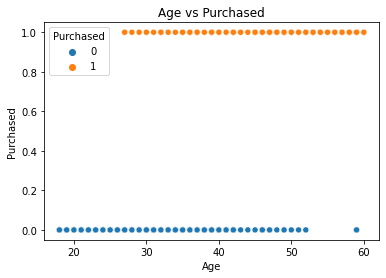

In [9]:
sns.scatterplot(x='Age', y='Purchased', data=dataset, hue='Purchased')
plt.title('Age vs Purchased')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)

LogisticRegression()

In [12]:
train_score = model.score(x_train.values.reshape(-1, 1), y_train)
print(f"Train Model Accuracy: {train_score * 100:.2f}%")

test_score = model.score(x_test.values.reshape(-1, 1), y_test)
print(f"Test Model Accuracy: {test_score * 100:.2f}%")

Train Model Accuracy: 82.19%
Test Model Accuracy: 91.25%


In [13]:
model_predictions = model.predict(x_test.values.reshape(-1, 1))

In [14]:
model.predict([[30]])  # Example prediction for age 30

array([0], dtype=int64)

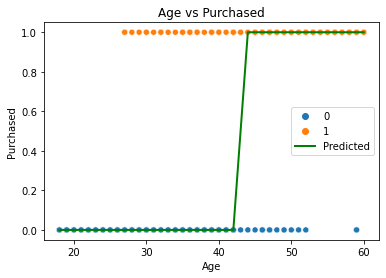

In [15]:
sns.scatterplot(x='Age', y='Purchased', data=dataset, hue='Purchased')
sns.lineplot(x=x_test, y=model_predictions, color='green', label='Predicted', linewidth=2)
plt.title('Age vs Purchased')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.show()

# Logistic Regression (Binary Classification-Multiple Input)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset_multi_Input = pd.read_csv(r"C:\Users\Muhammad Uzair\Downloads\Datasets\Social_Network_Ads.csv")
dataset_multi_Input.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [18]:
dataset_multi_Input.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
dataset_multi_Input.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(dataset_multi_Input[['Gender']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender']))
dataset_multi_Input = pd.concat([dataset_multi_Input.drop('Gender', axis=1), encoded_df], axis=1)

In [21]:

# Assign the 'Gender_Male' column to 'Gender'
dataset_multi_Input['Gender'] = dataset_multi_Input['Gender_Male']

In [22]:
dataset_multi_Input.head(3)
dataset_multi_Input.drop(columns ='Gender_Male' , inplace=True)

In [23]:
x = dataset_multi_Input.loc[:, ['User ID', 'Age', 'EstimatedSalary', 'Gender']]
y = dataset_multi_Input['Purchased']

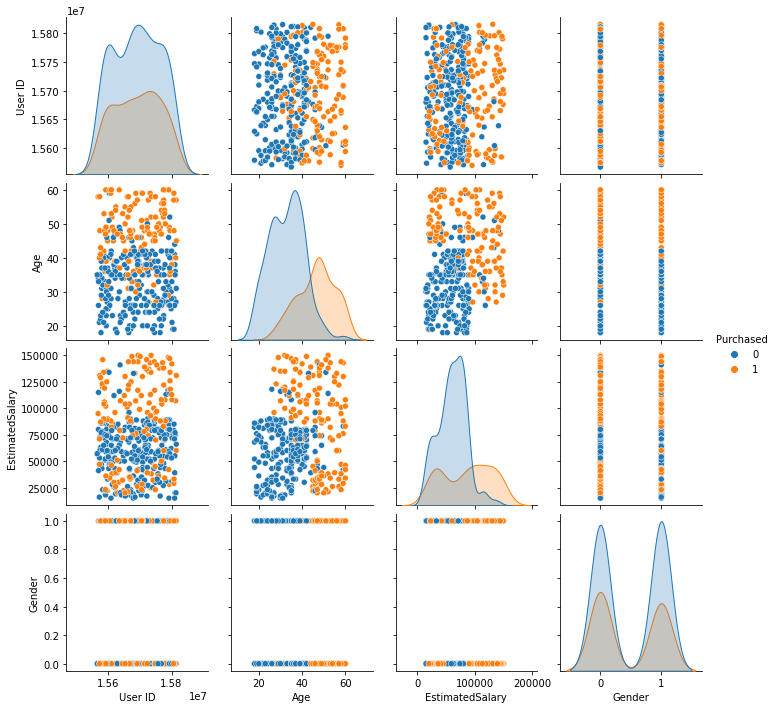

In [24]:
sns.pairplot(dataset_multi_Input, hue='Purchased')
plt.show()

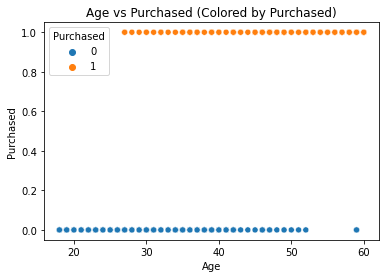

In [25]:
sns.scatterplot(x='Age', y='Purchased', data=dataset_multi_Input, hue='Purchased')
plt.title('Age vs Purchased (Colored by Purchased)')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
model_multi_input = LogisticRegression()
model_multi_input.fit(x_train, y_train)

LogisticRegression()

In [28]:
model_multi_input.score(x_train, y_train)

0.840625

In [29]:
model_multi_input.score(x_test, y_test)

0.8875

In [30]:
model_multi_input.predict([[15624510,19,19000,1.0]])  # Example prediction for age 30, salary 50000, and

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [31]:
dataset_multi_Input.head(3)

,User ID,Age,EstimatedSalary,Purchased,Gender
0,15624510,19,19000,0,1.0
1,15810944,35,20000,0,1.0
2,15668575,26,43000,0,0.0


Text(0.5, 0, 'Age')

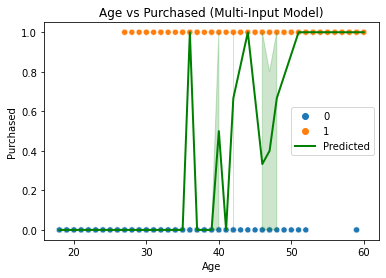

In [32]:


# Generate predictions for the test set
model_multi_input_predictions = model_multi_input.predict(x_test)

sns.scatterplot(x='Age', y='Purchased', data=dataset_multi_Input, hue='Purchased')
sns.lineplot(x=x_test['Age'], y=model_multi_input_predictions, color='green', label='Predicted', linewidth=2)
plt.title('Age vs Purchased (Multi-Input Model)')
plt.xlabel('Age')

# Logistic Regression (Multiclass Classification)

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
dataset = pd.read_csv(r"C:\Users\Muhammad Uzair\Downloads\Datasets\Iris.csv")
dataset.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [35]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
dataset.drop(columns=['Id'], inplace=True)

In [37]:
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


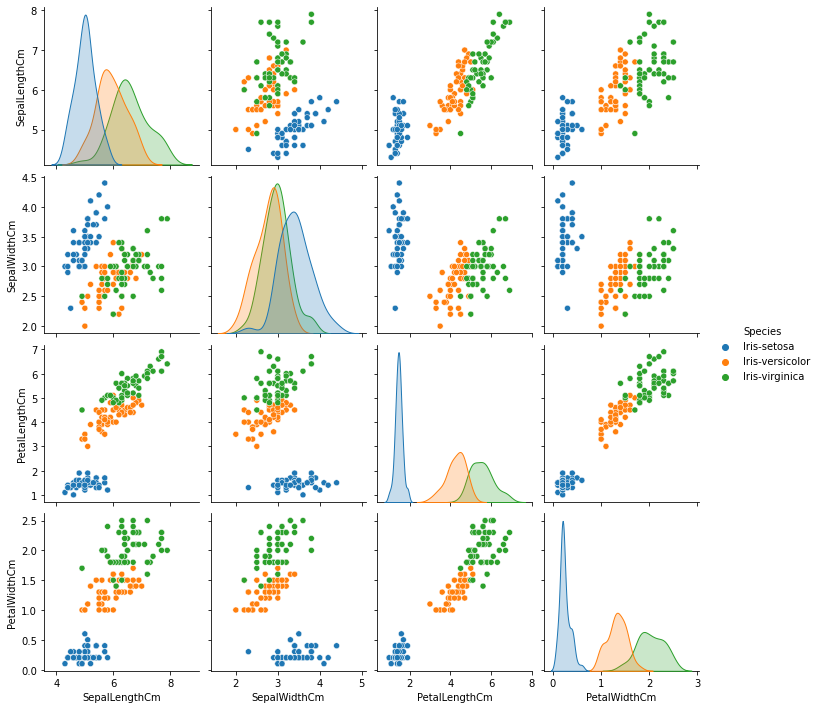

In [38]:
sns.pairplot(data=dataset, hue='Species')
plt.show()

In [39]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [40]:
x = dataset.iloc[:, :-1]  # Features (all columns except 'Species')
y = dataset['Species']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Multiclass with OVR Method

In [42]:
from sklearn.linear_model import LogisticRegression
model_iris = LogisticRegression(multi_class='ovr')
model_iris.fit(x_train, y_train)


c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [43]:
print(f"Train Model Accuracy: {model_iris.score(x_train, y_train) * 100:.2f}%")
print(f"Test Model Accuracy: {model_iris.score(x_test, y_test) * 100:.2f}%")

Train Model Accuracy: 95.00%
Test Model Accuracy: 96.67%


In [44]:
# Example prediction for a new data point (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm)
model_iris.predict([[6.4, 3.2, 4.5, 1.5]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [45]:
model_iris.predict([[4.6,3.2,1.4,0.2]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

### Multiclass with Multinomial Method

In [46]:
from sklearn.linear_model import LogisticRegression
model_iris = LogisticRegression(multi_class='multinomial')
model_iris.fit(x_train, y_train)


c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [47]:
print(f"Train Model Accuracy: {model_iris.score(x_train, y_train) * 100:.2f}%")
print(f"Test Model Accuracy: {model_iris.score(x_test, y_test) * 100:.2f}%")

Train Model Accuracy: 97.50%
Test Model Accuracy: 100.00%


In [48]:
# Example prediction for a new data point (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm)
model_iris.predict([[6.4, 3.2, 4.5, 1.5]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [49]:
model_iris.predict([[4.6,3.2,1.4,0.2]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,precision_score

accuracy = accuracy_score(y_test, model_iris.predict(x_test))
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00


In [58]:

y_pred = model_iris.predict(x_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1:.2f}")

Weighted F1 Score: 1.00


In [59]:
pr_score=precision_score(y_test, y_pred, average='weighted')
print(f"Weighted Precision Score: {pr_score:.2f}")

Weighted Precision Score: 1.00


In [52]:
model_iris.recall_score = model_iris.score(x_test, y_test)
print(f"Recall Score: {model_iris.recall_score:.2f}")

Recall Score: 1.00


In [53]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

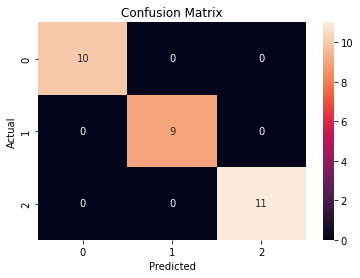

In [56]:
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()